In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [3]:
a + 5

array([5, 6, 7])

In [5]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

one-dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`.

In [7]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

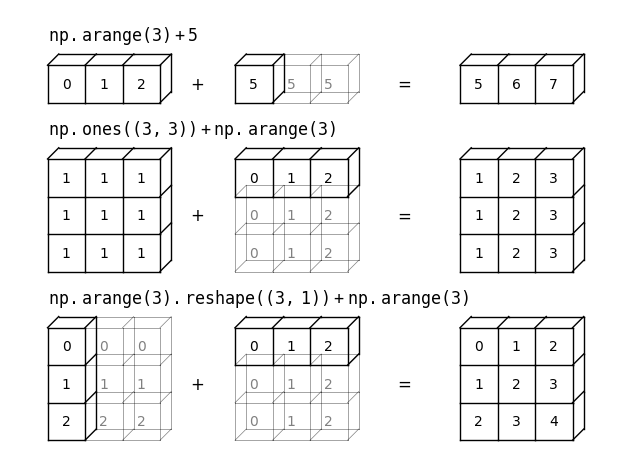

In [16]:
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

#------------------------------------------------------------
# Draw top operation: vector plus scalar
draw_cube(ax, (1, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (2, 10), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 10), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '5', **solid)
draw_cube(ax, (7, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)
draw_cube(ax, (8, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)

draw_cube(ax, (12, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 10), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (14, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '7', **solid)

ax.text(5, 10.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 10.5, '=', size=12, ha='center', va='center')
ax.text(1, 11.5, r'${\tt np.arange(3) + 5}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw middle operation: matrix plus vector

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '1', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '1', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '1', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '3', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center')
ax.text(1, 9.0, r'${\tt np.ones((3,\, 3)) + np.arange(3)}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw bottom operation: vector plus vector, double broadcast

# first block
draw_cube(ax, (1, 3), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '0', **solid)
draw_cube(ax, (1, 2), 1, depth, [2, 3, 4, 7, 10], '1', **solid)
draw_cube(ax, (1, 1), 1, depth, [2, 3, 4, 7, 10], '2', **solid)

draw_cube(ax, (2, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (2, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (2, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

draw_cube(ax, (3, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (3, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (3, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# second block
draw_cube(ax, (6, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 2), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 1), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 1), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (13, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (14, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (12, 2), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 2), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 2), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 1), 1, depth, [2, 3, 4], '2', **solid)
draw_cube(ax, (13, 1), 1, depth, [2, 3], '3', **solid)
draw_cube(ax, (14, 1), 1, depth, [2, 3, 7, 10], '4', **solid)

ax.text(5, 2.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 2.5, '=', size=12, ha='center', va='center')
ax.text(1, 4.5, r'${\tt np.arange(3).reshape((3,\, 1)) + np.arange(3)}$',
        ha='left', size=12, va='bottom')

ax.set_xlim(0, 16)
ax.set_ylim(0.5, 12.5)

fig.savefig('figures/02.05-broadcasting.png')
        

## Rules of Broadcasting

### Rule 1:

If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

### Rule 2:

If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimesnion is stretched to match the other shape.

### Rule 3:

If in any dimension the sizes disagree and neither is euqal to 1, an error is raised.



In [21]:
M = np.ones((2, 3))
M.shape, M

((2, 3),
 array([[1., 1., 1.],
        [1., 1., 1.]]))

In [20]:
a = np.arange(3)
a, a.shape

(array([0, 1, 2]), (3,))

In [22]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

R1: `a` has fewer dimensions, so padding it on the left with ones.
 
* M.shape -> (2, 3)
* a.shape -> (1, 3)

R2: the first dimension disagrees, so we stretch this dimension to match.

* M.shape -> (2, 3)
* a.shape -> (2, 3)

In [25]:
a = np.arange(3).reshape((3, 1))
a, a.shape

(array([[0],
        [1],
        [2]]),
 (3, 1))

In [26]:
b = np.arange(3)
b, b.shape

(array([0, 1, 2]), (3,))

Rule 1: 

* a.shape -> (3, 1)
* b.shape -> (1, 3)

Rule 2:

* a.shape -> (3, 3)
* b.shape -> (3, 3)

In [27]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [28]:
M = np.ones((3, 2))
M, M.shape

(array([[1., 1.],
        [1., 1.],
        [1., 1.]]),
 (3, 2))

In [30]:
a = np.arange(3)
a, a.shape

(array([0, 1, 2]), (3,))

Rule 1:

M.shape = (3, 2)
a.shape = (3,)

rule 2:

M.shape -> (3, 2)
a.shape -> (1, 3)


In [31]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [32]:
a[:, np.newaxis].shape

(3, 1)

In [33]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

`logaddexp(a, b)` function computes `log(exp(a) + exp(b))` with more precision than the naive approach:

In [34]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

### Centering an array

In [36]:
# Array of 10 observations, each of which consists of 3 values
X = np.random.random((10, 3))
X

array([[0.21815895, 0.41303131, 0.2137699 ],
       [0.76705185, 0.3933504 , 0.40204754],
       [0.49899789, 0.28269374, 0.2848676 ],
       [0.3983658 , 0.57897947, 0.47825156],
       [0.71853654, 0.34573587, 0.44276996],
       [0.30840025, 0.7119294 , 0.09968674],
       [0.24259885, 0.63145124, 0.55918145],
       [0.40702135, 0.20772763, 0.504809  ],
       [0.83929458, 0.7342383 , 0.0595043 ],
       [0.91620497, 0.33040909, 0.91284647]])

In [38]:
Xmean = X.mean(0) # collapese first dimension
Xmean

array([0.5314631 , 0.46295464, 0.39577345])

In [39]:
# Now center the X array by subtracting the mean
# this is a broadcating operation
X_centered = X - Xmean
X_centered

array([[-0.31330415, -0.04992333, -0.18200355],
       [ 0.23558875, -0.06960425,  0.00627408],
       [-0.03246521, -0.1802609 , -0.11090585],
       [-0.13309731,  0.11602483,  0.08247811],
       [ 0.18707344, -0.11721878,  0.04699651],
       [-0.22306286,  0.24897475, -0.29608671],
       [-0.28886425,  0.16849659,  0.163408  ],
       [-0.12444175, -0.25522702,  0.10903555],
       [ 0.30783148,  0.27128365, -0.33626915],
       [ 0.38474187, -0.13254555,  0.51707302]])

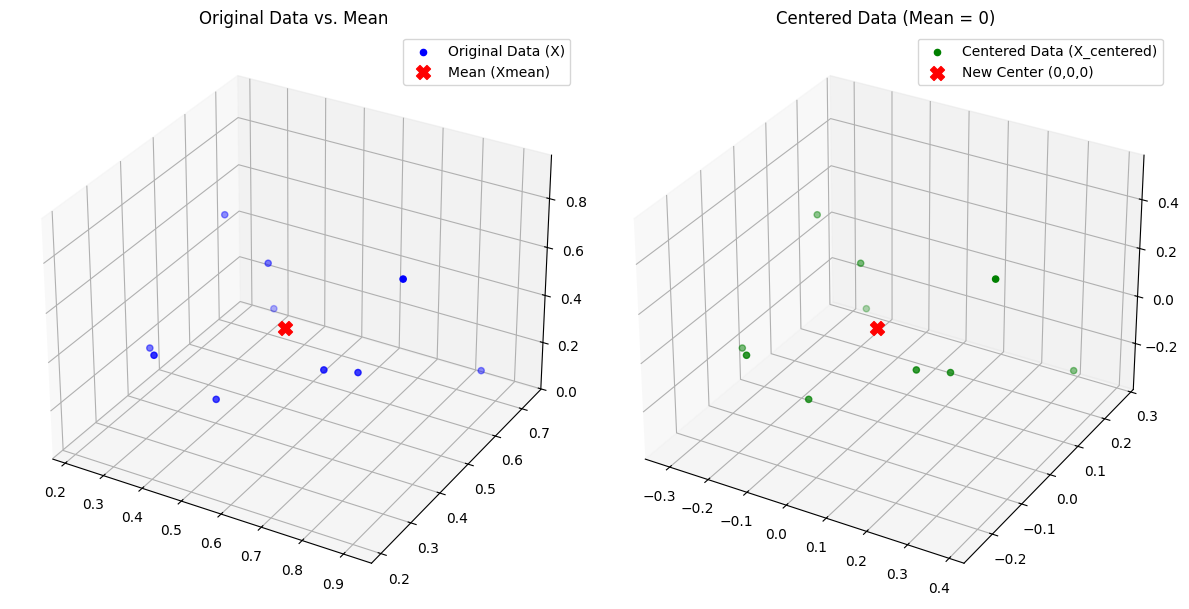

In [42]:
fig = plt.figure(figsize=(12, 6))

# Plot 1: Original Data (X) and Mean (Xmean)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', label='Original Data (X)')
ax1.scatter(*Xmean, c='red', s=100, marker='X', label='Mean (Xmean)')
ax1.set_title('Original Data vs. Mean')
ax1.legend()

# Plot 2: Centered Data (X_centered)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], 
           c='green', label='Centered Data (X_centered)')
ax2.scatter(0, 0, 0, c='red', s=100, marker='X', label='New Center (0,0,0)')
ax2.set_title('Centered Data (Mean = 0)')
ax2.legend()

plt.tight_layout()
plt.show()

In [44]:
X_centered.mean(0)

array([-4.44089210e-17, -3.33066907e-17, -5.55111512e-17])

### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function z = f(x, y), broadcasting can be used to compute the function across the grid:

In [45]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

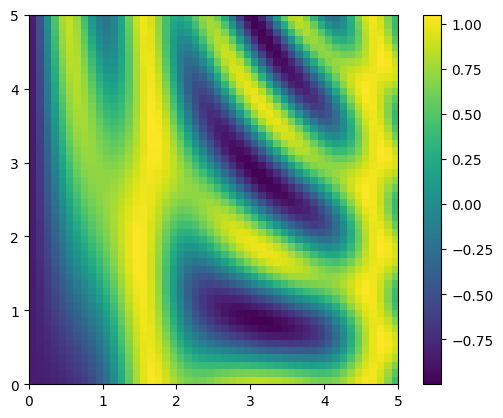

In [46]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

# Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [48]:
import pandas as pd

In [50]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254. # 1/10mm -> inches
inches.shape

(365,)

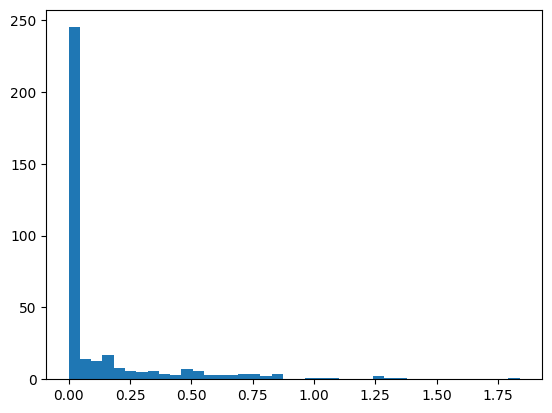

In [51]:
plt.hist(inches, 40);

## Comparison Operators as ufuncs

In [52]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [53]:
x < 3

array([ True,  True, False, False, False])

In [54]:
x >= 3

array([False, False,  True,  True,  True])

In [55]:
x != 3

array([ True,  True, False,  True,  True])

In [56]:
x == 3

array([False, False,  True, False, False])

In [57]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [60]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [61]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [62]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

### Counting entries

In [63]:
np.count_nonzero(x < 6)

8

There are eight array entries that are less than 6. Another way to get at this information is to use `np.sum`; this case, `False` is interpreted as `0`, and `True` as `1`:

In [64]:
np.sum(x < 6)

np.int64(8)

In [65]:
# sum() can be used an aggreation function
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [66]:
# are there any values greater than 8?

In [67]:
np.any(x > 8)

np.True_

In [68]:
# are there any values less than zero?

In [69]:
np.any(x < 0)

np.False_

In [70]:
# are all values less than 10?
np.all(x < 10)

np.True_

In [71]:
# are all values equal to 6?

In [73]:
np.all(x == 6)

np.False_

In [78]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [79]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

### Boolean operators

In [80]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

In [83]:
# A AND B == NOT(NOT A OR NOT B)
np.sum(~((inches <= 0.5) | (inches >= 1))).item()

29

In [88]:
print(f'Number of days without rain: {np.sum(inches == 0)}')
print(f'Number days with rain: {np.sum(inches != 0)}')
print(f'Days with more than 0.5 inches: {np.sum(inches > 0.5)}')
print(f'Rainy days with < 0.2 inches: {np.sum((inches > 0) & (inches < 0.2))}')

Number of days without rain: 215
Number days with rain: 150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches: 75


## Boolean Arrays as Masks

In [89]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [90]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

To select these values from the array, we can simply index on this Boolean array; this is known as as *masking* operation:

In [91]:
x[x < 5]

array([0, 3, 3, 3, 2, 4], dtype=int32)

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in position at which the masks array is `True`.

In [95]:
# construct a mask of all rainy days
rainy = (inches > 0)
# print(rainy)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)
# print(summer)

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non summer rainy days (inches): ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non summer rainy days (inches):  0.20078740157480315


## Aside: Using the keywords and/or Versus the operators &/|

The difference is: `and` and `or` gauge the truth or falsehood of *entire object*, while `&` and `|` refer to *bits within each object*.

In [97]:
bool(42), bool(0)

(True, False)

In [98]:
bool(43 and 0)

False

In [99]:
bool(43 or 0)

True


When using `&` and `|` on integers, the expression operates on the bits of the element, applying the *and* or *or* to the individual bits making the number.

In [100]:
bin(42)

'0b101010'

In [101]:
bin(59)

'0b111011'

In [102]:
bin(42 & 59)

'0b101010'

In [103]:
bin(42 | 59)

'0b111011'

In [104]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [105]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [106]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [107]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Fancy Indexing

## Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.

In [111]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74], dtype=int32)

In [112]:
# Access three different elements
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [115]:
# alternatively, pass a single list or array of indices 
ind = [3, 7, 2]
x[ind]

array([71, 86, 14], dtype=int32)

In [116]:
[x[3], x[7], x[2]] == x[ind]

array([ True,  True,  True])

When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

In [117]:
ind = np.array([[3, 7],
                [4, 5]])

x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

In [118]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74], dtype=int32)

In [121]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [122]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [124]:
X[row[:, np.newaxis], col] # broadcasting

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [125]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

** Fancy indexing returns the value that reflects the broadcasted shape of the indices, rather than the shape of the array being indexed. **

## Combined Indexing

In [126]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [127]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [128]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [129]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [131]:
# An N by D matrix representing N points in D dimensions
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

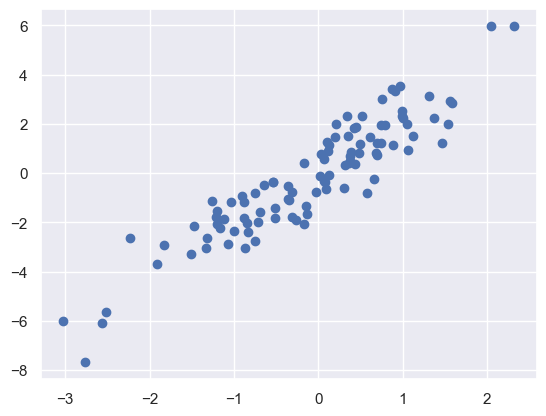

In [133]:
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1]);

In [134]:
# Select 20 random points
indices = np.random.choice(X.shape[0], 20, replace=True)
indices

array([69, 10, 15, 10, 12, 65, 43, 61, 15, 27, 18, 94, 14, 63, 66, 68, 91,
       27, 71, 62], dtype=int32)

In [135]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

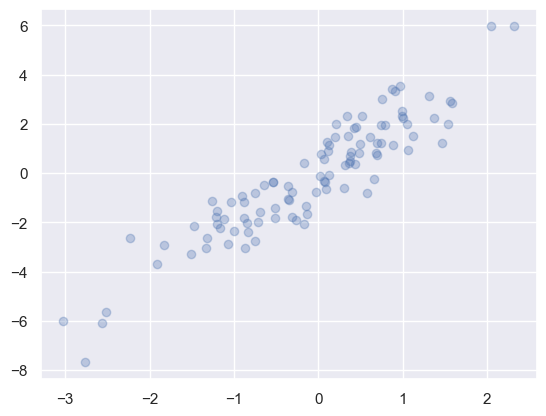

In [138]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

## Modifying Values with Fancy Indexing

In [139]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [140]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

note that the repeated indices with these operations can cause some potentially unexpected results.

In [141]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [142]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [143]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

## Example: Binning Data

In [145]:
# Imagine we have 1000 values and would like to quickly find 
# where they fall within an array of bins.
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

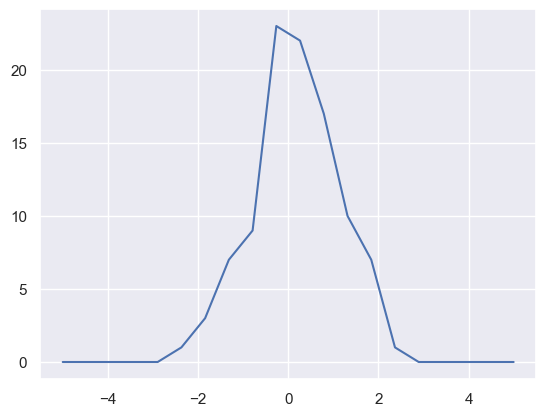

In [150]:
plt.plot(bins, counts, linestyle='solid');

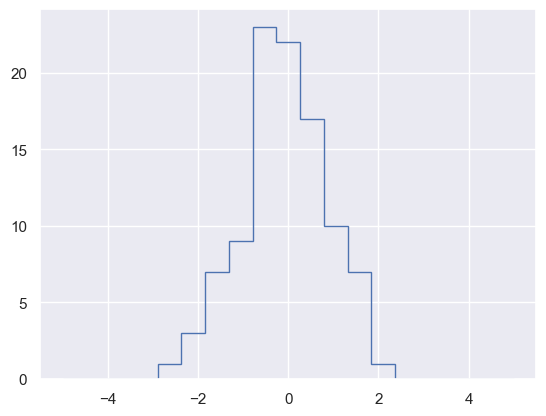

In [151]:
plt.hist(x, bins, histtype='step');

In [152]:
np.histogram?

Signature:       np.histogram(a, bins=10, range=None, density=None, weights=None)
Call signature:  np.histogram(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function histogram at 0x000001F2431BC9A0>
File:            c:\users\linho\appdata\local\packages\pythonsoftwarefoundation.python.3.13_qbz5n2kfra8p0\localcache\local-packages\python313\site-packages\numpy\lib\_histograms_impl.py
Docstring:      
Compute the histogram of a dataset.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined b

# Sorting Arrays

In [154]:
# Selection Sort

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [161]:
x = np.arange(1, 1000)
%timeit selection_sort(x)

4.47 ms ± 243 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [156]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [162]:
x = np.arange(1, 1000)
%timeit bogosort(x)

8.72 μs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Fast Sorting in NumPy: `np.sort` and `np.argsort`

By default, `np.sort` uses an **O[N log N]**, *quicksort* algorithm, though *mergesort* and *heapsort* are also available.

In [166]:
x = np.array([2, 1, 4, 5, 3])
np.sort(x), x

(array([1, 2, 3, 4, 5]), array([2, 1, 4, 5, 3]))

In [167]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [168]:
# returns the indices of the sorted elements
x = np.array([2, 1, 4, 5, 3])
i = np.argsort(x)
i

array([1, 0, 4, 2, 3])

In [170]:
x[i] # fancy indexing returns the sorted array

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

In [171]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]], dtype=int32)

In [172]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]], dtype=int32)

In [173]:
# sort row
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

## Partial Sorts: Partioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the `np.partition` function which takes an array and a number *k* and returns a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order.

In [174]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [177]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

## Example: k-Nearest Neighbors

`argsort` computes indices of the sort. We use this along multiple axes to find the nearest neighbors of each point in a set.

We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a 10x2 array:


In [189]:
X = rand.rand(10, 2)
X, X.shape

(array([[0.92630088, 0.65107703],
        [0.91495968, 0.85003858],
        [0.44945067, 0.09541012],
        [0.37081825, 0.66884125],
        [0.66592236, 0.59129779],
        [0.27472179, 0.56124343],
        [0.38292687, 0.9717121 ],
        [0.84891382, 0.72172952],
        [0.23598492, 0.25606832],
        [0.04043359, 0.71066289]]),
 (10, 2))

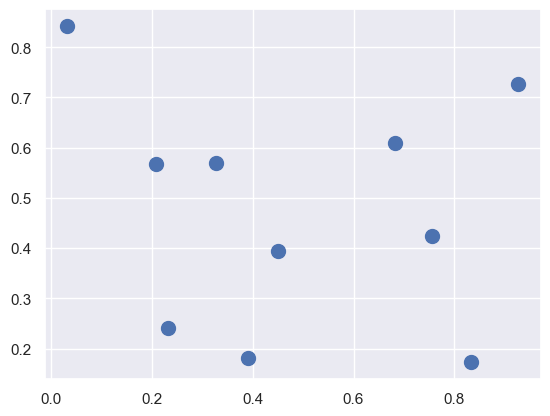

In [180]:
plt.scatter(X[:, 0], X[:, 1], s=100)

Now we'll compute the distance between each pairs of points. The squared-distance between two points is the sum of the squared differenes in each dimension.

In [181]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [182]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [186]:
X[:, np.newaxis, :].shape, X[:, np.newaxis, :]

((10, 1, 2),
 array([[[0.23089383, 0.24102547]],
 
        [[0.68326352, 0.60999666]],
 
        [[0.83319491, 0.17336465]],
 
        [[0.39106061, 0.18223609]],
 
        [[0.75536141, 0.42515587]],
 
        [[0.20794166, 0.56770033]],
 
        [[0.03131329, 0.84228477]],
 
        [[0.44975413, 0.39515024]],
 
        [[0.92665887, 0.727272  ]],
 
        [[0.32654077, 0.57044397]]]))

In [187]:
X[np.newaxis, :, :], X[np.newaxis, :, :].shape

(array([[[0.23089383, 0.24102547],
         [0.68326352, 0.60999666],
         [0.83319491, 0.17336465],
         [0.39106061, 0.18223609],
         [0.75536141, 0.42515587],
         [0.20794166, 0.56770033],
         [0.03131329, 0.84228477],
         [0.44975413, 0.39515024],
         [0.92665887, 0.727272  ],
         [0.32654077, 0.57044397]]]),
 (1, 10, 2))

In [190]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [191]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [192]:
# the set of distances between each point and itself (0)
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [193]:
# the leftmost columns will give the indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 7, 5, 9, 4, 1, 2, 6, 8],
       [1, 4, 8, 7, 9, 2, 5, 3, 0, 6],
       [2, 4, 3, 7, 1, 8, 0, 9, 5, 6],
       [3, 0, 7, 9, 5, 4, 2, 1, 6, 8],
       [4, 1, 2, 7, 8, 3, 9, 0, 5, 6],
       [5, 9, 7, 6, 0, 3, 1, 4, 8, 2],
       [6, 5, 9, 7, 0, 1, 3, 4, 8, 2],
       [7, 9, 3, 0, 5, 4, 1, 2, 8, 6],
       [8, 1, 4, 2, 7, 9, 5, 3, 0, 6],
       [9, 5, 7, 0, 1, 3, 6, 4, 8, 2]])

The first column gives the numbers 0 through 9 in order, this is due to the fact that each point's closest neighbor is itself.

By using a full sort here, we've actually done more work than we need to in tis case. If we're simply interested in the nearest *k* neighbors, all we need to partition each row so that the smallest *k + 1* squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the `np.argpartition` function:


In [205]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[0, 3, 7, 5, 9, 4, 1, 2, 6, 8],
       [1, 4, 8, 7, 9, 2, 5, 3, 0, 6],
       [2, 4, 3, 7, 1, 8, 0, 9, 5, 6],
       [3, 0, 7, 9, 5, 4, 2, 1, 6, 8],
       [4, 1, 2, 7, 8, 3, 9, 0, 5, 6],
       [5, 9, 7, 6, 0, 3, 1, 4, 8, 2],
       [6, 5, 9, 7, 0, 1, 3, 4, 8, 2],
       [7, 9, 3, 0, 5, 4, 1, 2, 8, 6],
       [8, 1, 4, 2, 7, 9, 5, 3, 0, 6],
       [9, 5, 7, 0, 1, 3, 6, 4, 8, 2]])

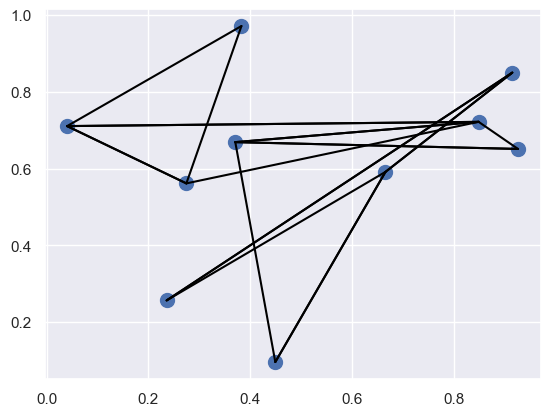

In [207]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')


# Structured Data: NumPy's Structured Arrays

This section demonstrates the use of NumPy's *structured arrays* and *record arrays*, which provide efficient storaeg for compound, heterogeneous data.

Imagine that we have several categories of data on the number of people (say, name, age, and weight), and we'd like to store these values for use in a Python program.

In [208]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [209]:
x = np.zeros(4, dtype=int)

In [213]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names': ('name', 'age', 'weight'),
                          'formats': ('U10', 'i4', 'f8')}
               )
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Here 'U10' translates to "Unicode string of maximum length 10," 'i4' translates to "4-byte (i.e., 32 bit) integer," and 'f8' translates to "8-byte (i.e., 64 bit) float."

In [214]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [215]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [216]:
data[0]

np.void(('Alice', 25, 55.0), dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [217]:
data[-1]['name']

np.str_('Doug')

In [218]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

## Creating Structured Arrays


In [221]:
np.dtype({'names': ('name', 'age', 'weight'),
          'formats': ('U10', 'i4', 'f8')}
        )

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

For clarity, numerical types can be specified using Python types of numPy `dtype` instead:

In [222]:
np.dtype({'names': ('name', 'age', 'weight'),
          'formats': ((np.str_, 10), int, np.float32)}
        )

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [224]:
# Specified as a list of tupkes:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [225]:
# if names do not matter
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

## More Advancced Compound Types

In [229]:
# Create a data type with a `mat` component consisting of a 3x3 floating-point matrix
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])
print(X['mat'])

(0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


## RecordArrays: Structure Arrays with a Twist

NumPy also provides the `np.recarray` class, which is almost identical to the structured arrays just described, but with one additional feature: fields can be accessed as attributes rather than as dictionary keys.

In [230]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [232]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [234]:
# however, there is extra overhead
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

167 ns ± 7.42 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
2.47 μs ± 80.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.16 μs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
